In [1]:
# This script is referred from http://rdkit.blogspot.jp/2015/02/new-drawing-code.html
# and http://cheminformist.itmol.com/TEST/wp-content/uploads/2015/07/rdkit_moldraw2d_2.html
from __future__ import print_function
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG

from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D

import numpy as np
from matplotlib import pyplot as plt
import qml
import ase.units

import sys
sys.path.insert(0, '/home/misa/git_repositories/APDFT/prototyping/atomic_energies/hitp')
sys.path.insert(0, '/home/misa/git_repositories/APDFT/prototyping/atomic_energies/')
import find_converged as fc
import qml_interface as qmi
from explore_qml_data import shift2center

In [2]:
def moltosvg(mol,molSize=(450,150),kekulize=True):
    mc = Chem.Mol(mol.ToBinary())
    if kekulize:
        try:
            Chem.Kekulize(mc)
        except:
            mc = Chem.Mol(mol.ToBinary())
    if not mc.GetNumConformers():
        rdDepictor.Compute2DCoords(mc)
    drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],molSize[1])
    drawer.DrawMolecule(mc)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    return svg

def render_svg(svg):
    # It seems that the svg renderer used doesn't quite hit the spec.
    # Here are some fixes to make it work in the notebook, although I think
    # the underlying issue needs to be resolved at the generation step
    return SVG(svg.replace('svg:',''))


def sort_by_element(representations):
    """
    separate representations by element, store in dictionary divided by element
    """
    reps_el = {1:[], 6:[], 7:[], 8:[]}
    idx_el = {1:[], 6:[], 7:[], 8:[]}
    for i,r in enumerate(representations):
        Z = int(np.round(np.power(r[0]*2, 1/2.4)))
        reps_el[Z].append(r)
        # index in representation matrix, can be used to get index of molecule and this way its name and smiles string
        idx_el[Z].append(i)
    return(reps_el, idx_el)

In [18]:
paths = qmi.wrapper_alch_data()
alchemy_data, molecule_size = qmi.load_alchemy_data(paths)
representations = qmi.generate_atomic_representations(alchemy_data, molecule_size)
representations_89 = qmi.generate_atomic_representations([alchemy_data[89]], [molecule_size[89]])

In [29]:
path_d001212 = '/home/misa/datasets/qm9/dsgdb9nsd_001212.xyz'
d001212 = qml.Compound(xyz=path_d001212)
d001212.coordinates = shift2center(d001212.coordinates, np.array([10, 10, 10]))
d001212.coordinates = d001212.coordinates/ase.units.Bohr
d001212_rep = qml.representations.generate_atomic_coulomb_matrix(d001212.nuclear_charges, d001212.coordinates, size=20, sorting='row-norm')

In [32]:
# sort representations by element for d001212_rep
d001212_rel, d001212_iel = sort_by_element(d001212_rep)

In [33]:
# sort representations by element
reps_el, idx_el = sort_by_element(representations)

### Distance of N's to N in d001212_rep

In [34]:
dN = []
for r in reps_el[7]:
    dN.append(np.linalg.norm(r-d001212_rel[7][0]))

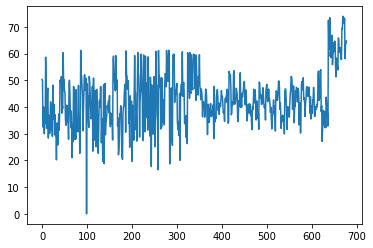

In [36]:
plt.plot(dN)

In [ ]:
smiles = 'CC(=O)OCC#N'

mol = Chem.MolFromSmiles(smiles)

print('smiles:', smiles)
render_svg(moltosvg(mol))